# CPU utilization for both architectures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

micro_arch = pd.read_csv("/content/drive/MyDrive/cpu/micro_arch.csv")
mono_arch = pd.read_csv("/content/drive/MyDrive/cpu/mono_arch.csv")

micro_arch.head(), mono_arch.head()


(             timestamp     value
 0  2024-05-04 18:49:00  0.331694
 1  2024-05-04 18:49:10  0.456657
 2  2024-05-04 18:49:20  0.581620
 3  2024-05-04 18:49:30  0.706583
 4  2024-05-04 18:49:40  0.831545,
              timestamp     value
 0  2024-05-04 17:29:00  0.265591
 1  2024-05-04 17:29:10  0.411240
 2  2024-05-04 17:29:20  0.556888
 3  2024-05-04 17:29:30  0.702537
 4  2024-05-04 17:29:40  0.848185)

## Plotting data

In [ ]:
micro_values = micro_arch['value']
mono_values = mono_arch['value']

t_stat, p_val = stats.ttest_ind(micro_values, mono_values)
print(f"T-Test: t-statistic = {t_stat:.4f},\n p-value = {p_val:.4f}")

# Hypothesis for T-Test
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis for the T-Test: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis for the T-Test: The means are not significantly different.")





T-Test: t-statistic = -3.3823,
 p-value = 0.0008
Reject the null hypothesis for the T-Test: The means are significantly different.


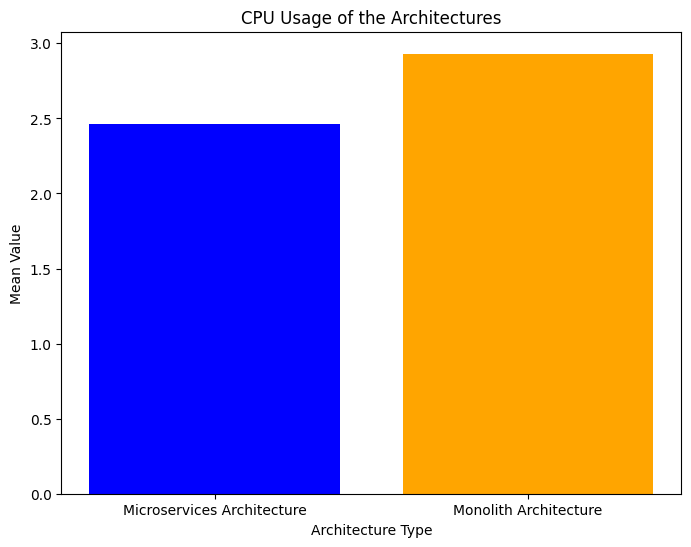

In [ ]:
mean_micro = micro_arch['value'].mean()
mean_mono = mono_arch['value'].mean()

labels = ['Microservices Architecture', 'Monolith Architecture']
mean_values = [mean_micro, mean_mono]

plt.figure(figsize=(8, 6))
plt.bar(labels, mean_values, color=['blue', 'orange'])
plt.title('CPU Usage of the Architectures')
plt.xlabel('Architecture Type')
plt.ylabel('Mean Value')
plt.show()


# Power Consumption Analysis

In [ ]:
microservices_data = pd.read_csv('/content/drive/MyDrive/power_consumption/power_consumption_microservices.csv')
monolith_data = pd.read_csv('/content/drive/MyDrive/power_consumption/power_consumption_monolith.csv')

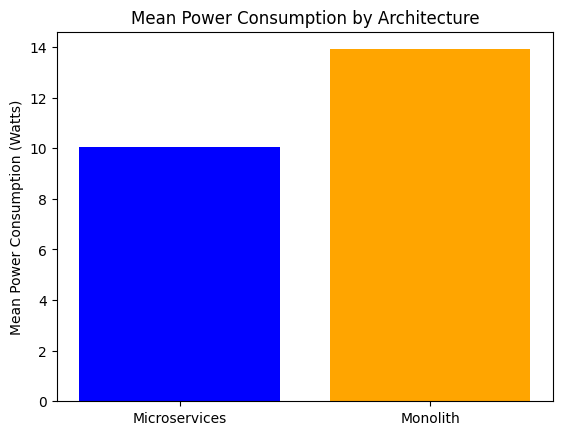

t value:  -3.3100623145585444
p_value:  0.0016076005284837603
T TEST: 
 Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = 0.0016).
ANOVA TEST: 
 Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = 0.0016).


In [ ]:
# Calculating the mean for each dataset
microservices_mean = microservices_data['Watts'].mean()
monolith_mean = monolith_data['Watts'].mean()

plt.bar(['Microservices', 'Monolith'], [microservices_mean, monolith_mean], color=['blue', 'orange'])
plt.ylabel('Mean Power Consumption (Watts)')
plt.title('Mean Power Consumption by Architecture')
plt.show()

# Perform T-Test
t_stat, p_value = stats.ttest_ind(microservices_data['Watts'], monolith_data['Watts'])

alpha = 0.05
print("t value: ", t_stat)
print("p_value: ", p_value)
if p_value < alpha:
    t_test_result = f"Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = {p_value:.4f})."
else:
    t_test_result = f"Fail to reject the null hypothesis: there is no significant difference in power consumption between the two architectures (p-value = {p_value:.4f})."

# Perform ANOVA Test
anova_stat, anova_p_value = stats.f_oneway(microservices_data['Watts'], monolith_data['Watts'])

if anova_p_value < alpha:
    anova_result = f"Reject the null hypothesis: the power consumption between the two architectures is significantly different (p-value = {anova_p_value:.4f})."
else:
    anova_result = f"Fail to reject the null hypothesis: there is no significant difference in power consumption between the two architectures (p-value = {anova_p_value:.4f})."

print("T TEST: \n", t_test_result)
print("ANOVA TEST: \n", anova_result)

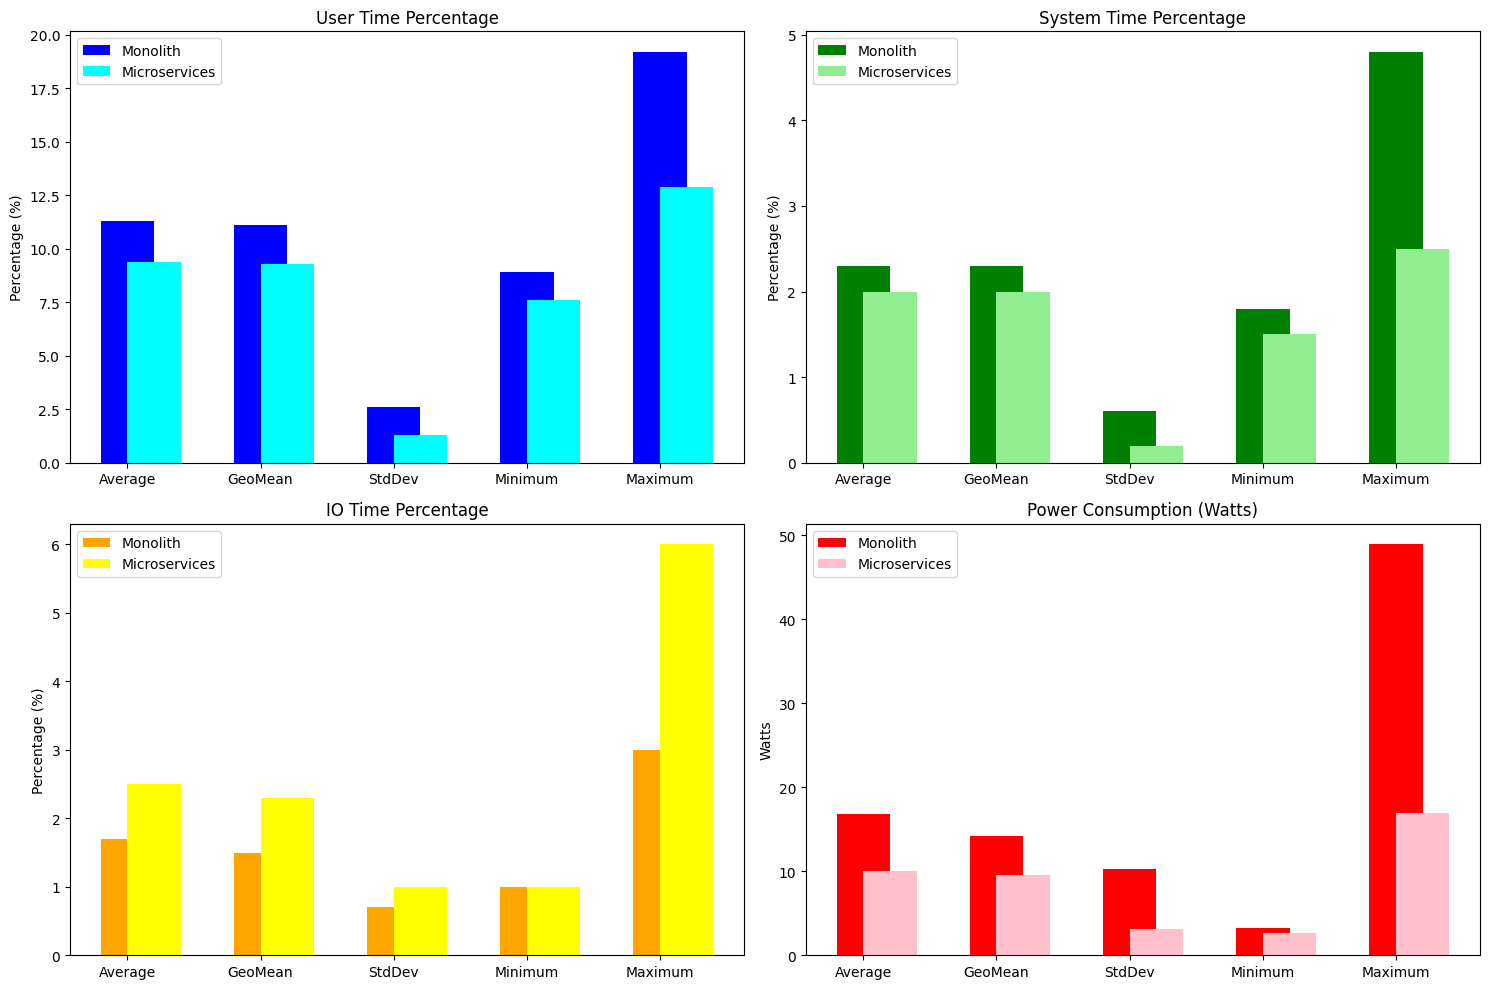

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/power_consumption/powerstat_monolith_vs_microservices.csv")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# "User percentage"
axes[0, 0].bar(df['Time'], df['Monolith User'], width=0.4, label='Monolith', align='center', color='blue')
axes[0, 0].bar(df['Time'], df['Microservices User'], width=0.4, label='Microservices', align='edge', color='cyan')
axes[0, 0].set_title("User Time Percentage")
axes[0, 0].set_ylabel("Percentage (%)")
axes[0, 0].legend()

# "System percentage"
axes[0, 1].bar(df['Time'], df['Monolith Sys'], width=0.4, label='Monolith', align='center', color='green')
axes[0, 1].bar(df['Time'], df['Microservices Sys'], width=0.4, label='Microservices', align='edge', color='lightgreen')
axes[0, 1].set_title("System Time Percentage")
axes[0, 1].set_ylabel("Percentage (%)")
axes[0, 1].legend()

# "IO percentage"
axes[1, 0].bar(df['Time'], df['Monolith IO'], width=0.4, label='Monolith', align='center', color='orange')
axes[1, 0].bar(df['Time'], df['Microservices IO'], width=0.4, label='Microservices', align='edge', color='yellow')
axes[1, 0].set_title("IO Time Percentage")
axes[1, 0].set_ylabel("Percentage (%)")
axes[1, 0].legend()

# "Watts"
axes[1, 1].bar(df['Time'], df['Monolith Watts'], width=0.4, label='Monolith', align='center', color='red')
axes[1, 1].bar(df['Time'], df['Microservices Watts'], width=0.4, label='Microservices', align='edge', color='pink')
axes[1, 1].set_title("Power Consumption (Watts)")
axes[1, 1].set_ylabel("Watts")
axes[1, 1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


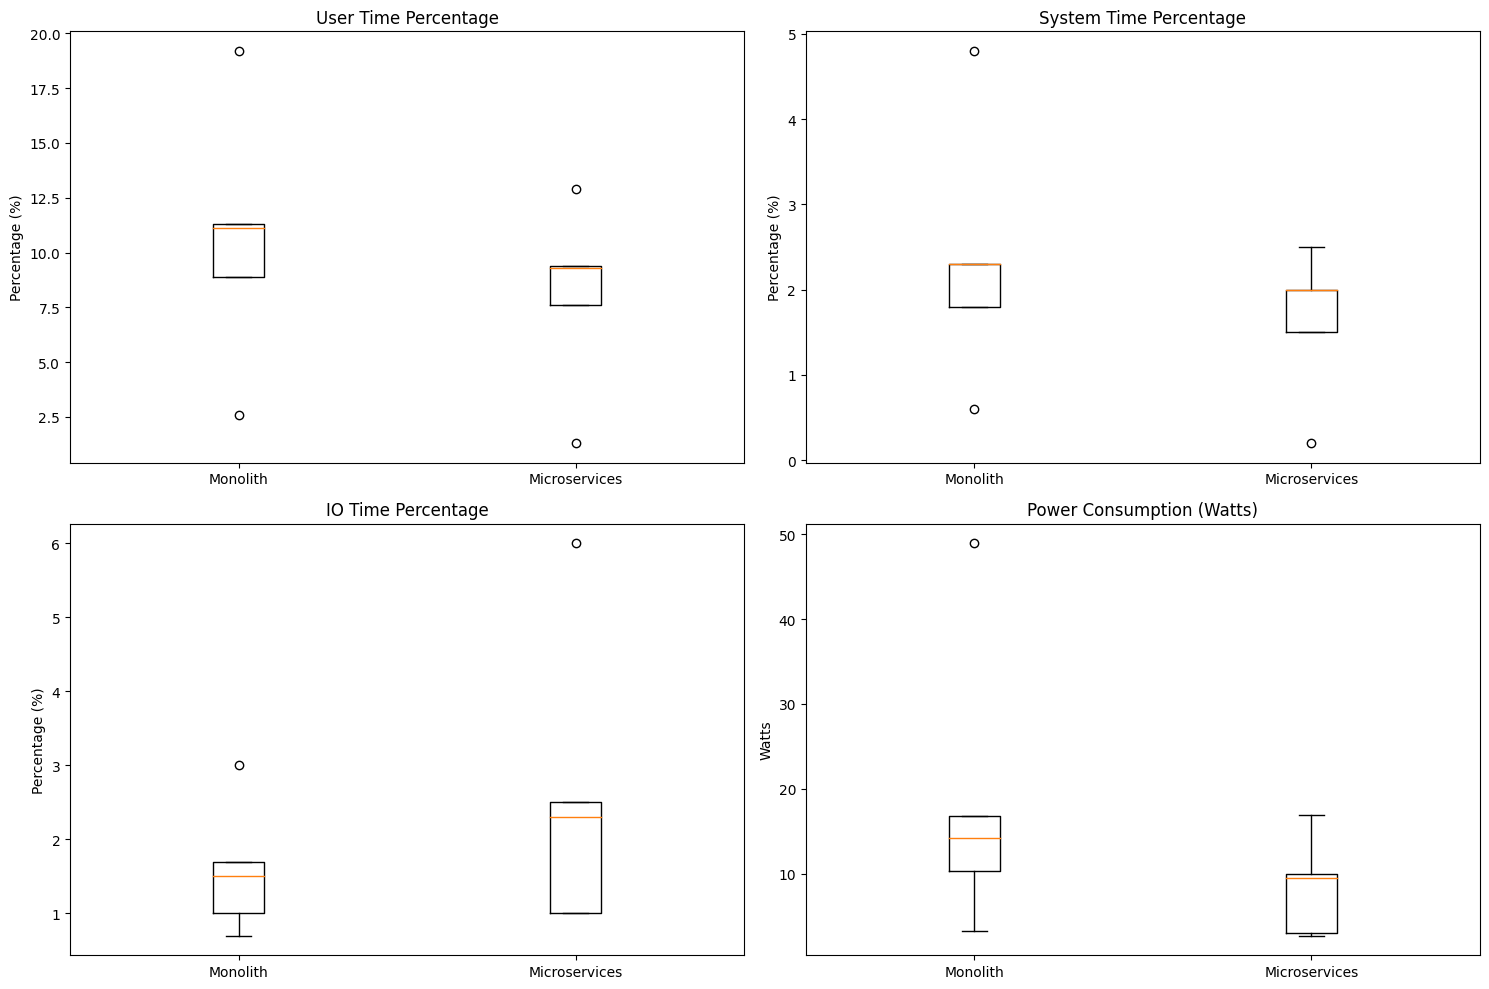

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0, 0].boxplot([df['Monolith User'], df['Microservices User']], labels=['Monolith', 'Microservices'])
axes[0, 0].set_title("User Time Percentage")
axes[0, 0].set_ylabel("Percentage (%)")

axes[0, 1].boxplot([df['Monolith Sys'], df['Microservices Sys']], labels=['Monolith', 'Microservices'])
axes[0, 1].set_title("System Time Percentage")
axes[0, 1].set_ylabel("Percentage (%)")

axes[1, 0].boxplot([df['Monolith IO'], df['Microservices IO']], labels=['Monolith', 'Microservices'])
axes[1, 0].set_title("IO Time Percentage")
axes[1, 0].set_ylabel("Percentage (%)")

axes[1, 1].boxplot([df['Monolith Watts'], df['Microservices Watts']], labels=['Monolith', 'Microservices'])
axes[1, 1].set_title("Power Consumption (Watts)")
axes[1, 1].set_ylabel("Watts")

plt.tight_layout()
plt.show()